<h2 align="center"> Phase 1 : DataRequirement, Data Collection & Data understanding </h2> 

In [ ]:
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

data = pd.read_csv("/content/finalista.csv")
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data=data.drop(['Unnamed: 0'],axis=1)
data=data.drop(['Unnamed: 0.1'],axis=1)

In [ ]:
data

,Description,Duration,Technologies,Topic,Trainees,Location,Field,Company Name
0,development web microservice allow link two ap...,5,our start-up one first tunisian companies depl...,microservice parsing edi,1,"sousse,tunisia",NaN,InSoDev
1,project consists designing developing solution...,5,"ia, ml, mysql , python, php, symfony, microser...",delivery optimization service,1,"sousse,tunisia",NaN,InSoDev
2,existing service necessary develop service cal...,5,"rest api, nest.js, node.js, mysql, redis.",path calculation service,1,"sousse,tunisia",NaN,InSoDev
3,objective stage develop administration allows ...,5,"docker,rest , mysql server , react js",administration web,1,"sousse,tunisia",NaN,InSoDev
4,design development solution based automated pr...,5,"testlink , artillery, mochawesome , junit, git...",design development platform automated process,1,"sousse,tunisia",NaN,InSoDev
5,objective internship integrate management tool...,5,"linux debain, web, microservice, data science....",integration data management tool microservice ...,1,"sousse,tunisia",NaN,InSoDev
6,scanlog application application intended drive...,5,"testlink , appium, testng,junit ,maven, github...",automation scanlog application tests,1,"sousse,tunisia",NaN,InSoDev
7,corner application management traceability cus...,5,"testlink , artillery, mochawesome , junit, git...",performance load test application corner,1,"sousse,tunisia",NaN,InSoDev
8,automation build test application deployment c...,5,"terraform , shell , javascript , python enviro...",automation optimization deployment migration a...,1,"sousse,tunisia",NaN,InSoDev
9,mission set cicd chain applications coded odoo...,4 to 6,gitlab ci/jenkins - containerd - prometheus - ...,odooflutter cicd,1,"tunisia,sfax",DevOps & Cloud,Fogits


In [ ]:
data.shape

(474, 8)

# `Data Cleaning`

1.   Removing special characters
2.   Remove punctuation
3.   Convert to lowercase
4.   Remove stop words
5.   Tokenization
6.   Lemitazation 





In [ ]:
def clean_text(text):
    # Remove special characters
    text = text.replace('\n', ' ').replace('\r', '').replace('\t', ' ')
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Join the cleaned words in a string
    text = ' '.join(words)
    return text

In [ ]:
from sklearn.feature_extraction import _stop_words
def clean_text1(text):
    # Remove special characters
    text = text.replace('\n', ' ').replace('\r', '').replace('\t', ' ').replace(':', ' ').replace('and','').replace('months interested','').replace('english ms','').replace('office ms','').replace('problem solving','')
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Remove stop words
    #extra_stopword = ['of','the','in','tools','topic','department','english office','problem','solving','java spring','skills','critical','thinking','months','office','interested','good','knowledge','english','ms','office']
    #english_stop_words = _stop_words.ENGLISH_STOP_WORDS.union(extra_stopword)- set([word for word in stopwords.words('english') if word not in ['#','+','/']])
    stop_words = set(stopwords.words('english'))
    extra_stopwords = ['of','the','in','tools','topic','department','english office','problem','solving','java spring','skills','critical','thinking','months','office','interested','good','knowledge','english','ms','office']
    stop_words.update(extra_stopwords)
    # Split the text into words
    words = text.split()
    # Remove stop words from the list of words
    clean_words = [word for word in words if word not in stop_words]
    # Join the cleaned words in a string
    text = ' '.join(clean_words)
    return text

In [ ]:
def lower(text):
    text = text.lower()
    return text  

In [ ]:
data['Topic'] = data['Topic'].replace('\d+', '', regex=True)
data['Company Name'] = data['Company Name'].replace('pdfs/Fogits.pdf', 'Fogits', regex=True)
data['Company Name'] = data['Company Name'].replace('pdfs/Addin.pdf', 'Addin', regex=True)

data['Technologies'] = data['Technologies'].replace(':', '', regex=True)
#"---------------------------------------------"
data['Trainees'] = data['Trainees'].replace('Trainees', '', regex=True)
data['Trainees'] = data['Trainees'].replace('Trainee', '', regex=True)
data['Trainees'] = data['Trainees'].replace('interns', '', regex=True)
data['Trainees'] = data['Trainees'].replace('candidate', '', regex=True)
data['Trainees'] = data['Trainees'].replace('candidates', '', regex=True)
data['Trainees'] = data['Trainees'].replace('candidates', '', regex=True)
data['Trainees'] = data['Trainees'].replace('.0', '', regex=True)
data['Trainees'] = data['Trainees'].replace('Students', '', regex=True)
data['Trainees'] = data['Trainees'].replace('trainee', '', regex=True)
data['Trainees'] = data['Trainees'].replace('s', '', regex=True)
data['Trainees'] = data['Trainees'].replace('candidat', '', regex=True)
data['Trainees'] = data['Trainees'].replace('intern', '', regex=True)


#"---------------------------------------------"
data['Duration'] = data['Duration'].replace('months', '', regex=True)
data['Duration'] = data['Duration'].replace(':', '', regex=True)
data['Duration'] = data['Duration'].replace(',starting date 1 february', '', regex=True)

#"---------------------------------------------"
data['Location'] = data['Location'].replace('sousse,tunis', 'sousse', regex=True)
data['Location'] = data['Location'].replace('tunisia', 'tunis', regex=True)
data['Location'] = data['Location'].replace('tunis,sfax', 'sfax', regex=True)
data['Location'] = data['Location'].replace('sousseia', 'sousse', regex=True)
data['Location'] = data['Location'].replace(' tunis', 'tunis', regex=True)
data['Location'] = data['Location'].replace('coficab', '', regex=True)

 

In [ ]:
data['Company Name'] = data['Company Name'].astype(str)
data['Topic'] = data['Topic'].astype(str)
data['Duration'] = data['Duration'].astype(str)
data['Field'] = data['Field'].astype(str)
data['Technologies'] = data['Technologies'].astype(str)
data['Location'] = data['Location'].astype(str)
data['Description'] = data['Description'].astype(str)
data['Trainees'] = data['Trainees'].astype(str)

#--------------------------------------------------------
data['Description'] = data['Description'].apply(clean_text)
data['Technologies'] = data['Technologies'].apply(clean_text1)
data['Topic'] = data['Topic'].apply(clean_text)
data['Field'] = data['Field'].apply(clean_text1)
data['Duration'] = data['Duration'].apply(lower)
data['Location'] = data['Location'].apply(lower)
data['Technologies'] = data['Technologies'].apply(lower)


In [ ]:
data

,Description,Duration,Technologies,Topic,Trainees,Location,Field,Company Name
0,development web microservice allow link two ap...,5,our start-up one first tunisian companies depl...,microservice parsing edi,1,sousse,NaN,InSoDev
1,project consists designing developing solution...,5,"ia, ml, mysql , python, php, symfony, microser...",delivery optimization service,1,sousse,NaN,InSoDev
2,existing service necessary develop service cal...,5,"rest api, nest.js, node.js, mysql, redis.",path calculation service,1,sousse,NaN,InSoDev
3,objective stage develop administration allows ...,5,"docker,rest , mysql server , react js",administration web,1,sousse,NaN,InSoDev
4,design development solution based automated pr...,5,"testlink , artillery, mochawesome , junit, git...",design development platform automated process,1,sousse,NaN,InSoDev
5,objective internship integrate management tool...,5,"linux debain, web, microservice, data science....",integration data management tool microservice ...,1,sousse,NaN,InSoDev
6,scanlog application application intended drive...,5,"testlink , appium, testng,junit ,maven, github...",automation scanlog application tests,1,sousse,NaN,InSoDev
7,corner application management traceability cus...,5,"testlink , artillery, mochawesome , junit, git...",performance load test application corner,1,sousse,NaN,InSoDev
8,automation build test application deployment c...,5,"terraform , shell , javascript , python enviro...",automation optimization deployment migration a...,1,sousse,NaN,InSoDev
9,mission set cicd chain applications coded odoo...,4 to 6,gitlab ci/jenkins - containerd - prometheus - ...,odooflutter cicd,1,sfax,DevOps & Cloud,Fogits


In [ ]:
data = data.drop_duplicates(keep='first').reset_index(drop=True)
data.shape

(425, 8)

# `Data Visualization`









<Axes: ylabel='None'>

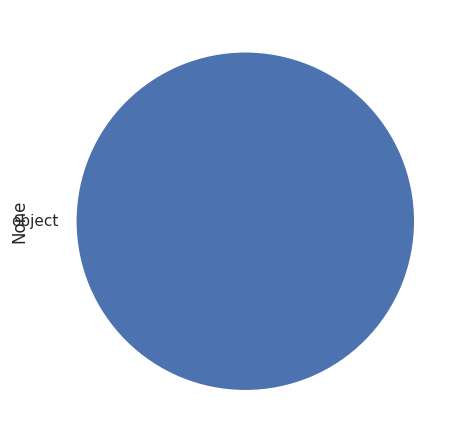

In [ ]:
data.dtypes.value_counts().plot.pie()

In [ ]:
data['Field'] = data['Field'].replace('nan', np.nan)
data['Description'] = data['Description'].replace('nan', np.nan)
data['Duration'] = data['Duration'].replace('nan', np.nan)
data['Location'] = data['Location'].replace('nan', np.nan)
data['Trainees'] = data['Trainees'].replace('nan', np.nan)
data['Technologies'] = data['Technologies'].replace('nan', np.nan)

**Missing Values**

In [ ]:
missing_value_cnt = data.isnull().sum()
missing_value_cnt
percentage=((data.isna().sum()*100/data.shape[0]))
data_types = data.dtypes
data_types
missing_values_table = pd.concat([missing_value_cnt, percentage, data_types], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 

                                                       1 : 'Percentage',
                                                       2 : 'Data Types'})
missing_values_table

,Missing Values,Percentage,Data Types
Description,7,1.647059,object
Duration,1,0.235294,object
Technologies,8,1.882353,object
Topic,0,0.000000,object
Trainees,0,0.000000,object
Location,0,0.000000,object
Field,97,22.823529,object
Company Name,0,0.000000,object


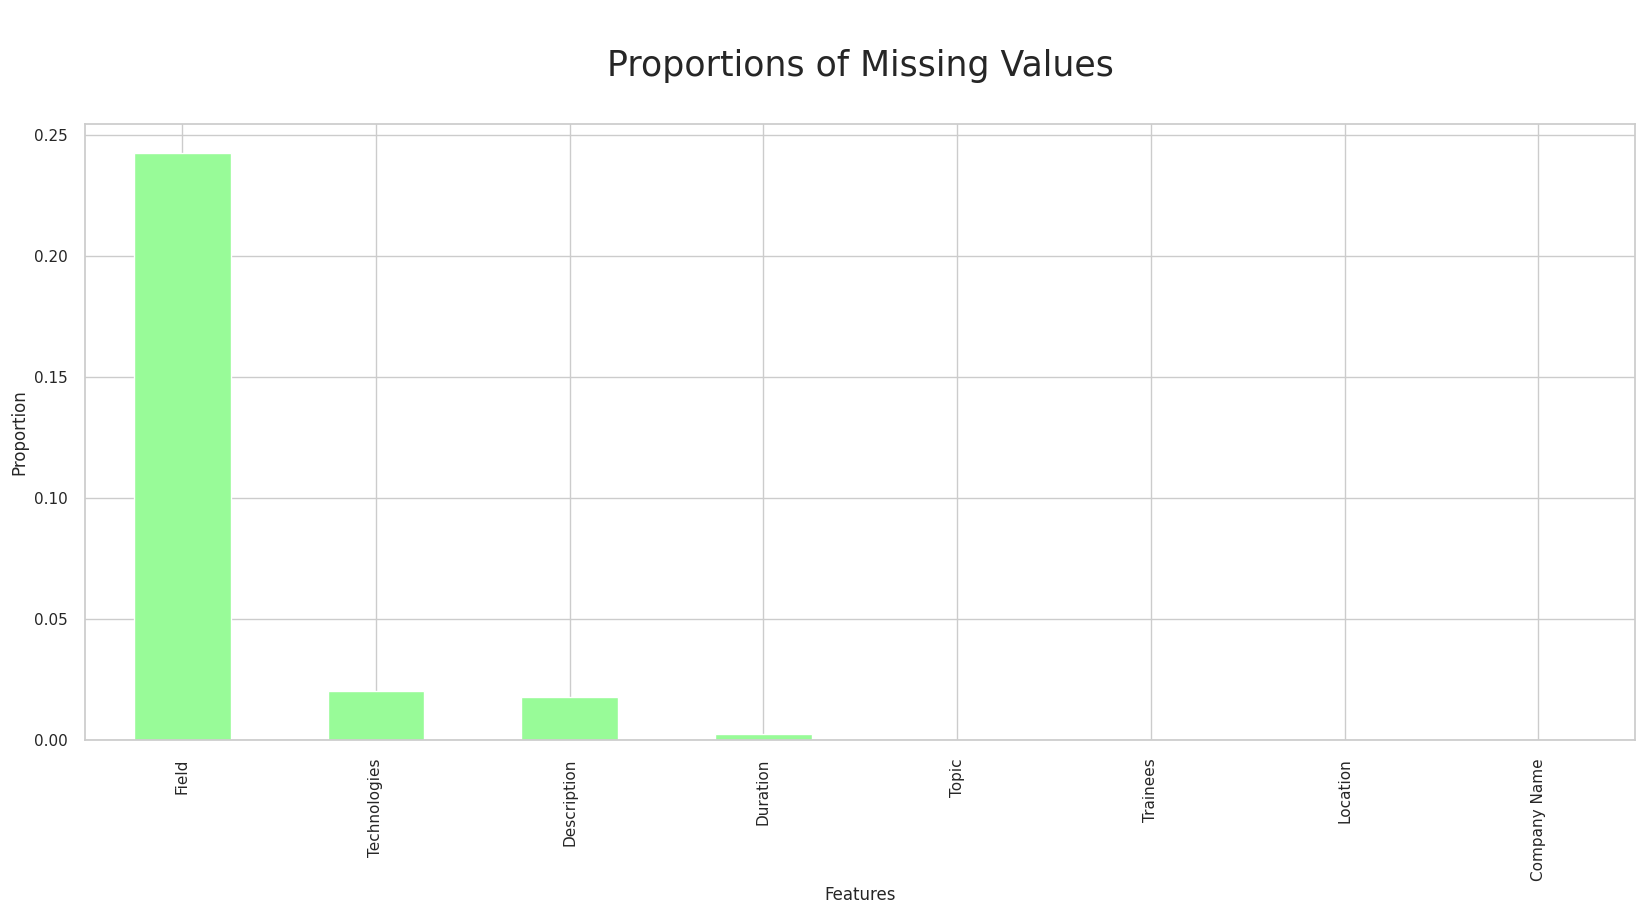

In [ ]:
missing=data.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
(missing/400).plot(kind="bar", color="palegreen") #400 is the number of patients/rows/examples/observations/lines in our data
#The "missing" variable contains the numbers of missing values, so we divide by 400 to get the proportions.
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

In [ ]:
data['Trainees'] = data['Trainees'].fillna(data['Trainees'].value_counts().idxmax())
data['Location'] = data['Location'].fillna(data['Location'].value_counts().idxmax())

**Geographical Distribution of Internship Offers**

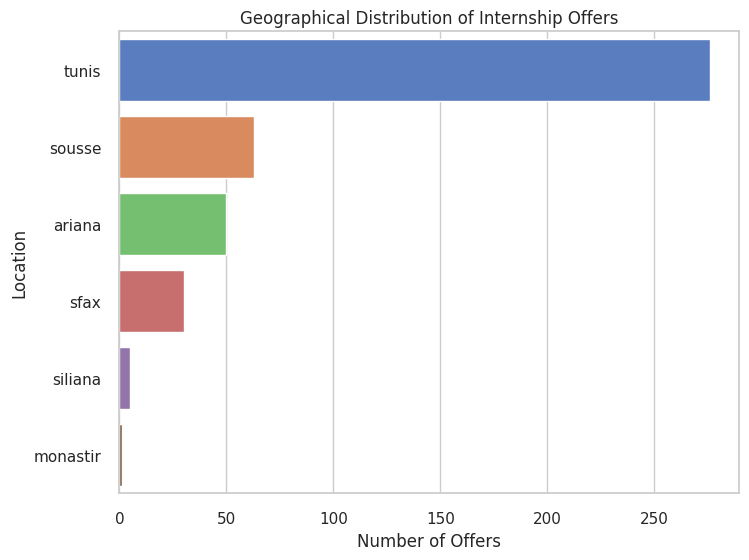

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=data['Location'].value_counts().values, y=data['Location'].value_counts().index, palette="muted")

ax.set_title("Geographical Distribution of Internship Offers")
ax.set_xlabel("Number of Offers")
ax.set_ylabel("Location")

plt.show()

In [ ]:
# define a lambda function to extract the first value as integer
to_int = lambda x: int(x.split()[0])

# apply the lambda function to the value column
data['Trainees'] = data['Trainees'].apply(to_int)


**Total trainees required by company**

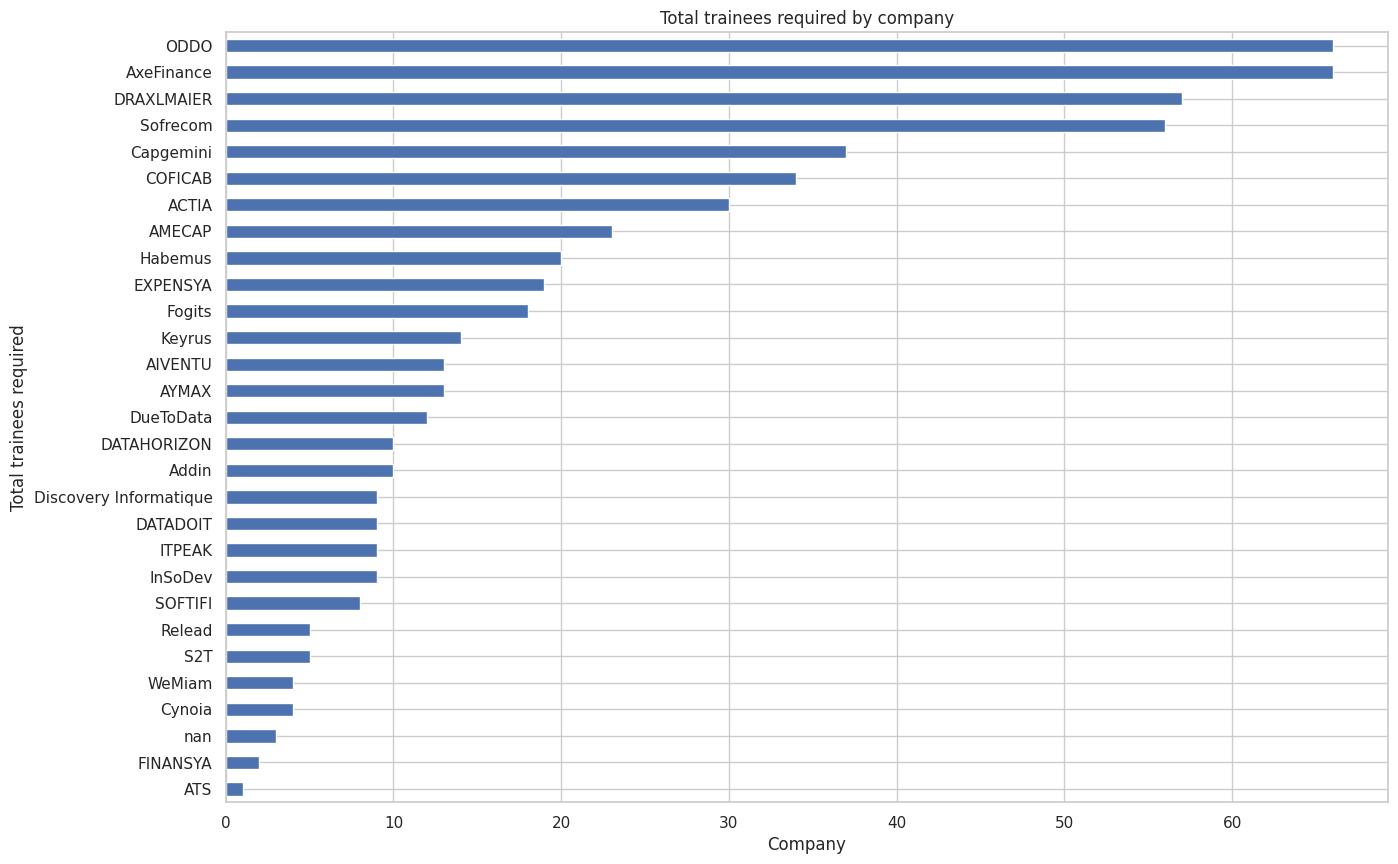

In [ ]:
company_trainees = data.groupby('Company Name')['Trainees'].sum().sort_values(ascending=True)

# plot the data
fig, ax = plt.subplots(figsize=(15,10))
company_trainees.plot(kind='barh')
plt.xlabel('Company')
plt.ylabel('Total trainees required')
plt.title('Total trainees required by company')
plt.show()

# Extracting Technologies

In [ ]:
import requests
import json
from pandas import json_normalize # easy JSON -> pd.DataFrame

In [ ]:
import spacy
def add_newruler_to_pipeline(skill_pattern_path):
    '''Reads in all created patterns from a JSONL file and adds it to the pipeline after PARSER and before NER'''
    
    #new_ruler = EntityRuler(nlp).from_disk(skill_pattern_path)
    #ruler=nlp.add_pipe('entity_ruler', after='parser')
    ruler=nlp.add_pipe('entity_ruler', after='parser')
    ruler.from_disk(skill_pattern_path)  # loads patterns only
    return ruler
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe = add_newruler_to_pipeline("/content/skill_patterns (1).jsonl")
#nlp.add_pipe = add_newruler_to_pipeline("/content/skill_db_relax_20.json")

nlp.pipe_names
df1=data

In [ ]:
skillsfinal=[]
for text in df1['Technologies'] :
  new_list=[]
  skills_list = []
  doc=nlp(str(text))
  for ent in doc.ents:
    if ent.label_.startswith("SKILL") or ent.label_=="ORG" :
      skills_list.append(ent.text)
  for value in skills_list:
        if value not in new_list:
            new_list.append(value)
  skillsfinal.append(str(new_list))
df1['Technologies']=skillsfinal
df1
df1.to_csv("extraction.csv")

In [ ]:
df1.tail(19)

,Description,Duration,Technologies,Topic,Trainees,Location,Field,Company Name
406,purpose project create app would able communic...,6,"['can', 'c']",graphics sharing android device raspberry pi m...,1,ariana,"Electrical Engineering, Automation,Microelectr...",Capgemini
407,design implement mobile radar system detection...,6,"['c', 'java', 'android', 'linux', 'raspberry pi']",installation mobile radar robot,1,ariana,"Electrical Engineering, Telecommunications,Mec...",Capgemini
408,design implement merchandise purchasing system...,6,"['c', 'python', 'java', 'ihm', 'can', 'arduino...",design implementation merchandise recognition ...,2,ariana,"Electrical engineering, power electronics",Capgemini
409,scanning system must allow capturing type surf...,6,"['c', 'python', 'java', 'ihm', 'can', 'arduino...",roll page scanning system prototype,2,ariana,"Electrical Engineering, Telecommunications,Emb...",Capgemini
410,order manage flow cvs received one hand specif...,6,"['c', 'python', 'java', 'ihm', 'can', 'arduino...",development automated matching system cv job o...,2,ariana,"Electrical engineering, power electronics",Capgemini
411,application allows upload videos related capge...,6,"['ia', 'data science', 'kotlin', 'java', 'sql']",development design platform dissemination even...,2,ariana,"Electrical Engineering, Telecommunications,Emb...",Capgemini
412,solving similar errors consultants speed solvi...,6,"['angular', 'nodejs', 'spring']",sharing knowledge platformdevelop house soluti...,1,ariana,"Electrical Engineering, Telecommunications,Emb...",Capgemini
413,document management system allows document pro...,6,"['python', 'django', 'java', 'react native', '...",design implementation document management system,2,ariana,"Computer Science, IT, IA",Capgemini
414,develop human resources application allowing m...,6,"['php', 'angular', 'sql', 'bootstrap', 'typesc...",human resource management application,1,ariana,Computer Engineering,Capgemini
415,modern ultra wide band wireless modules allow ...,6,"['microcontroller', 'stm32', 'signal processing']",evaluation ultra wide band indoor positioning ...,2,sfax,Electronic Engineering,Habemus


# Summmarize description

In [ ]:
!pip install sumy
import pandas as pd
import nltk
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer




# define a function to summarize the descriptions
def summarize_text(text):
    parser = PlaintextParser.from_string(text, Tokenizer('english'))
    summarizer = TextRankSummarizer()
    summary = summarizer(parser.document, sentences_count=2)
    return str(summary)

# apply the function to the 'description' column
df1['Description'] = df1['Description'].apply(summarize_text)
df1["Description"] = df1["Description"].str.replace('<Sentence:', '')
df1["Description"] = df1["Description"].str.replace('(', '')
df1["Description"] = df1["Description"].str.replace(')', '')
df1["Description"] = df1["Description"].str.replace('>', '')
# print the first 5 rows of the dataframe with the summary column
print(df1.head())

df1.to_csv("sumy.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
                                         Description Duration  \
0   development web microservice allow link two a...        5   
1   project consists designing developing solutio...        5   
2   existing service necessary develop service ca...        5   
3   objective stage develop administration allows...        5   
4   design development solution based automated p...        5   

                                        Technologies  \
0  ['web', 'microservice', 'parsing', 'web servic...   
1        ['ia', 'mysql', 'python', 'php', 'symfony']   
2  ['rest api', 'nest.js', 'node.js', 'mysql', 'r...   
3     ['docker', 'rest', 'mysql server', 'react js']   
4  ['testlink', 'artillery', 'mochawesome', 'juni...   

                                           Topic  Trainees Location Field  \
0                       microservice parsing edi         1   sousse   NaN   
1                  

<ipython-input-49-abc741f6924b>:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1["Description"] = df1["Description"].str.replace('(', '')
<ipython-input-49-abc741f6924b>:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1["Description"] = df1["Description"].str.replace(')', '')


## **5- Tokenization**

In [ ]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)
token_tech=df1['Technologies'].astype(str).apply(tokenize_text)
token_tech

0      [[, 'web, ', ,, 'microservice, ', ,, 'parsing,...
1      [[, 'ia, ', ,, 'mysql, ', ,, 'python, ', ,, 'p...
2      [[, 'rest, api, ', ,, 'nest.js, ', ,, 'node.js...
3      [[, 'docker, ', ,, 'rest, ', ,, 'mysql, server...
4      [[, 'testlink, ', ,, 'artillery, ', ,, 'mochaw...
5      [[, 'linux, ', ,, 'web, ', ,, 'microservice, '...
6      [[, 'testlink, ', ,, 'appium, ', ,, 'junit, ',...
7      [[, 'testlink, ', ,, 'artillery, ', ,, 'mochaw...
8      [[, 'terraform, ', ,, 'shell, ', ,, 'javascrip...
9      [[, 'gitlab, ci, ', ,, 'jenkins, ', ,, 'promet...
10     [[, 'docker, ', ,, 'compose, ', ,, 'ansible, '...
11                      [[, 'python, ', ,, 'linux, ', ]]
12                      [[, 'python, ', ,, 'linux, ', ]]
13                      [[, 'python, ', ,, 'linux, ', ]]
14       [[, 'devops, ', ,, 'python, ', ,, 'linux, ', ]]
15      [[, 'flutter, ', ,, 'python, ', ,, 'linux, ', ]]
16     [[, 'flutter, ', ,, 'dart, ', ,, 'linux, ', ,,...
17     [[, 'react.js, ', ,, 'py

In [ ]:
for i in range(len(token_tech)):
    if 'Spring' in token_tech[i] and 'Boot' in token_tech[i]:
        springboot_index = token_tech[i].index('Spring')
        token_tech[i][springboot_index:springboot_index+2] = ['spring boot']
    if 'spring' in token_tech[i] and 'boot' in token_tech[i]:
        springboot_index = token_tech[i].index('spring')
        token_tech[i][springboot_index:springboot_index+2] = ['spring boot']
    if 'Spring' in token_tech[i] and 'boot' in token_tech[i]:
        springboot_index = token_tech[i].index('Spring')
        token_tech[i][springboot_index:springboot_index+2] = ['spring boot']
    if 'Machine' in token_tech[i] and 'Learning' in token_tech[i]:
        springboot_index = token_tech[i].index('Machine')
        token_tech[i][springboot_index:springboot_index+2] = ['Machine Learning']
    if 'Machine' in token_tech[i] and 'learning' in token_tech[i]:
        springboot_index = token_tech[i].index('Machine')
        token_tech[i][springboot_index:springboot_index+2] = ['Machine Learning']
    if 'Power' in token_tech[i] and 'BI' in token_tech[i]:
        springboot_index = token_tech[i].index('Power')
        token_tech[i][springboot_index:springboot_index+2] = ['Power BI']
    if 'Power' in token_tech[i] and 'BIHuman' in token_tech[i]:
        springboot_index = token_tech[i].index('Power')
        token_tech[i][springboot_index:springboot_index+2] = ['Power BI']
    if 'Office' in token_tech[i] and 'MS' in token_tech[i]:
        springboot_index = token_tech[i].index('Office')
        token_tech[i][springboot_index:springboot_index+2] = ['Office MS']
    if 'office' in token_tech[i] and 'MS' in token_tech[i]:
        springboot_index = token_tech[i].index('office')
        token_tech[i][springboot_index:springboot_index+2] = ['Office MS']
    if 'Deep' in token_tech[i] and 'learning' in token_tech[i]:
        springboot_index = token_tech[i].index('Deep')
        token_tech[i][springboot_index:springboot_index+2] = ['Deep Learning']
    if 'Rest' in token_tech[i] and 'APIs' in token_tech[i]:
        springboot_index = token_tech[i].index('Rest')
        token_tech[i][springboot_index:springboot_index+2] = ['Rest APIs']
    if 'Rest' in token_tech[i] and 'API' in token_tech[i]:
        springboot_index = token_tech[i].index('Rest')
        token_tech[i][springboot_index:springboot_index+2] = ['Rest API']
    if 'REST' in token_tech[i] and 'API' in token_tech[i]:
        springboot_index = token_tech[i].index('REST')
        token_tech[i][springboot_index:springboot_index+2] = ['Rest API']
    if 'c' in token_tech[i] and '#' in token_tech[i]:
        springboot_index = token_tech[i].index('c')
        token_tech[i][springboot_index:springboot_index+2] = ['c#']
    if 'english' in token_tech[i] and 'office' in token_tech[i]:
        springboot_index = token_tech[i].index('english')
        token_tech[i][springboot_index:springboot_index+2] = ['']
print(token_tech)   


0      [[, 'web, ', ,, 'microservice, ', ,, 'parsing,...
1      [[, 'ia, ', ,, 'mysql, ', ,, 'python, ', ,, 'p...
2      [[, 'rest, api, ', ,, 'nest.js, ', ,, 'node.js...
3      [[, 'docker, ', ,, 'rest, ', ,, 'mysql, server...
4      [[, 'testlink, ', ,, 'artillery, ', ,, 'mochaw...
5      [[, 'linux, ', ,, 'web, ', ,, 'microservice, '...
6      [[, 'testlink, ', ,, 'appium, ', ,, 'junit, ',...
7      [[, 'testlink, ', ,, 'artillery, ', ,, 'mochaw...
8      [[, 'terraform, ', ,, 'shell, ', ,, 'javascrip...
9      [[, 'gitlab, ci, ', ,, 'jenkins, ', ,, 'promet...
10     [[, 'docker, ', ,, 'compose, ', ,, 'ansible, '...
11                      [[, 'python, ', ,, 'linux, ', ]]
12                      [[, 'python, ', ,, 'linux, ', ]]
13                      [[, 'python, ', ,, 'linux, ', ]]
14       [[, 'devops, ', ,, 'python, ', ,, 'linux, ', ]]
15      [[, 'flutter, ', ,, 'python, ', ,, 'linux, ', ]]
16     [[, 'flutter, ', ,, 'dart, ', ,, 'linux, ', ,,...
17     [[, 'react.js, ', ,, 'py

# **1-Gram to extract most frequent Technologies**



In [ ]:
def get_top_n1_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,1),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
ngram_corpus = token_tech.str.join(' ').unique()

In [ ]:
top1_words = get_top_n1_words(ngram_corpus, n = len(ngram_corpus))
top1_df = pd.DataFrame(top1_words)
top1_df.columns=["1-gram", "Freq"]

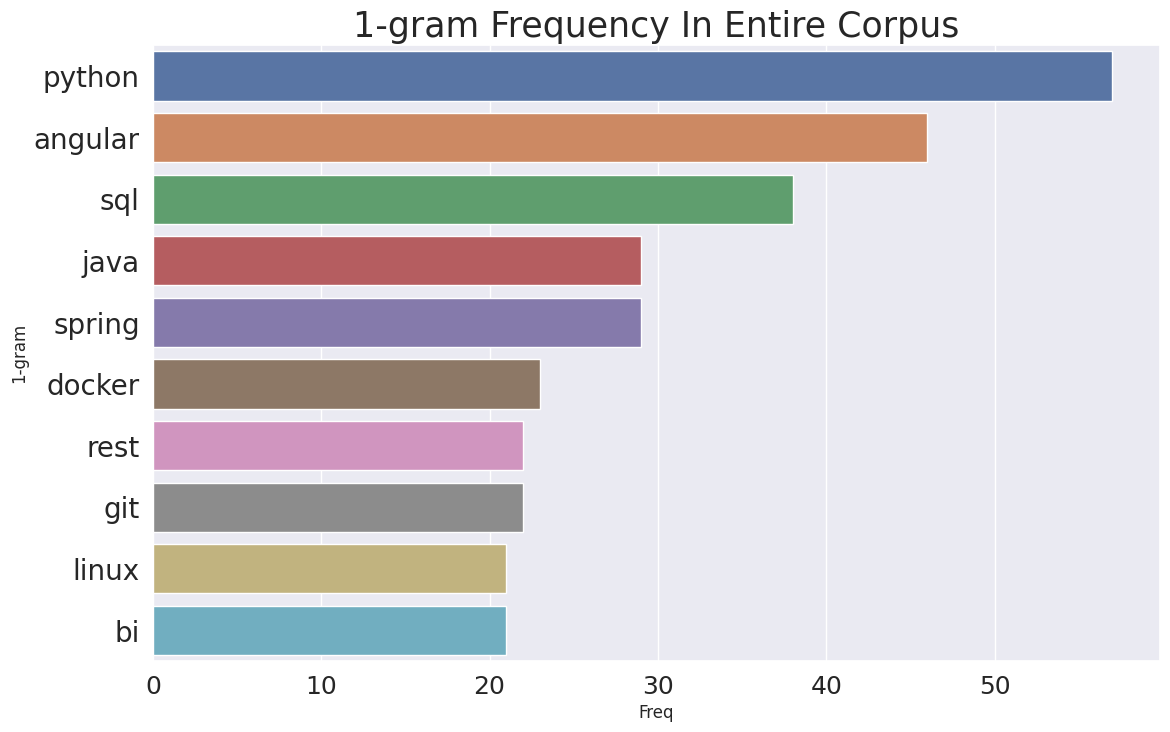

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
#Barplot of most freq 1-grams
sns.set(rc={'figure.figsize':(13,8)})
bbar = sns.barplot(y ="1-gram", x ="Freq", orient = 'h', data = top1_df[:10])
plt.title('1-gram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
bbar.set_yticklabels(bbar.get_yticklabels(), fontsize = 20);
plt.savefig('1-gram_bar.png', dpi=200)

# **BiGram to extract most frequent Technologies**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
ngram_corpus =token_tech.str.join(' ').unique()

In [ ]:
top2_words = get_top_n2_words(ngram_corpus, n = len(ngram_corpus))
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bigram", "Freq"]

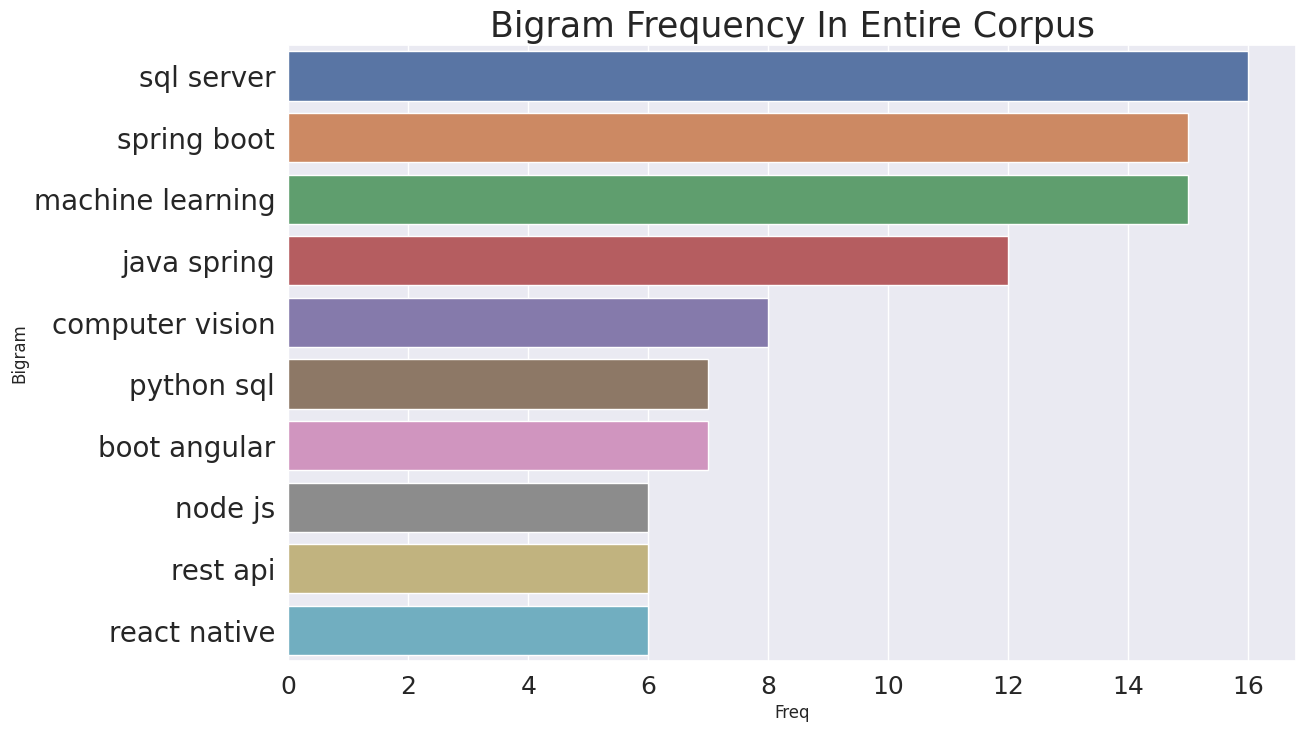

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
#Barplot of most freq 1-grams
sns.set(rc={'figure.figsize':(13,8)})
bbar = sns.barplot(y ="Bigram", x ="Freq", orient = 'h', data = top2_df[:10])
plt.title('Bigram Frequency In Entire Corpus', size=25)
plt.xticks(size = 18)
bbar.set_yticklabels(bbar.get_yticklabels(), fontsize = 20);
plt.savefig('Bigram_bar.png', dpi=200)

## **Word Cloud to extract most frequent Technologies**

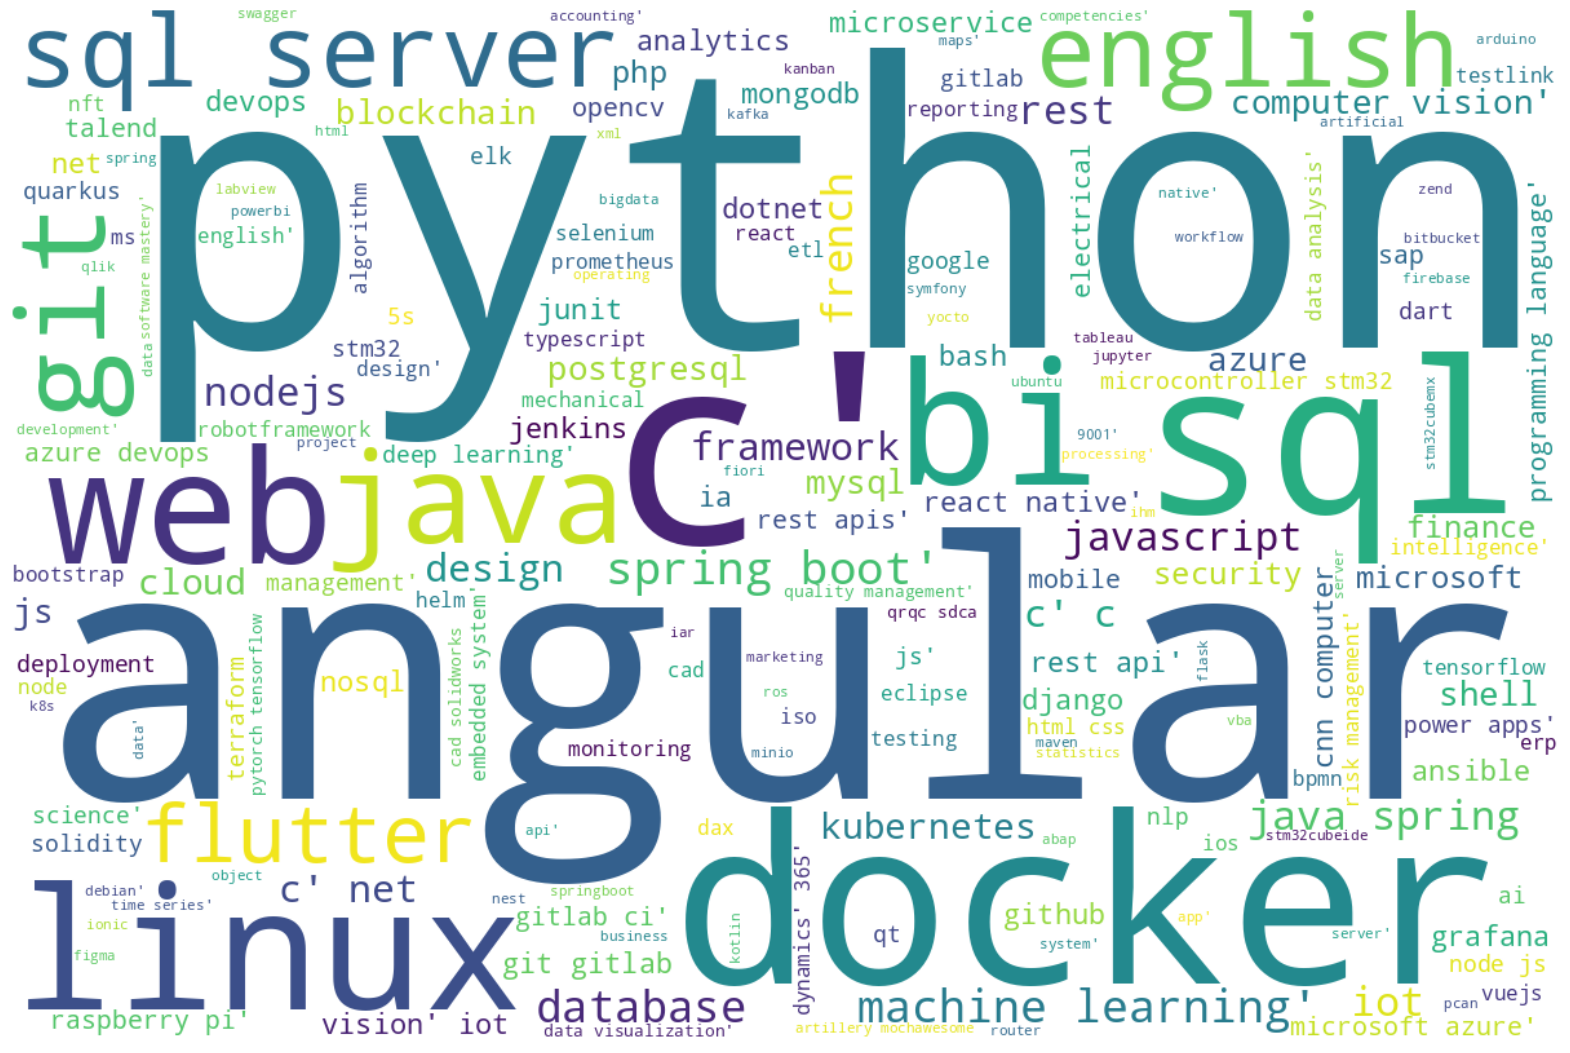

The most important technologies are:
python
angular
c'
docker
sql
linux
bi
web
java
git


In [ ]:
# Step 2: Extract the technologies
unique_technologies = token_tech.astype(str).unique()
technologies = " ".join(unique_technologies)
# Step 3: Generate the word cloud
wordcloud = WordCloud(width=1200, height=800, background_color="white" ,min_font_size=10).generate(technologies)
# Step 4: Display the word cloud
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# Step 5: Extract the most important technologies
# We can extract the most important technologies by looking at the size of each word in the word cloud
words = wordcloud.words_
most_important_technologies = sorted(words.items(), key=lambda x: x[1], reverse=True)[:10]
print("The most important technologies are:")
for technology in most_important_technologies:
    print(technology[0])

<ipython-input-68-a1f618c5cc0b>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


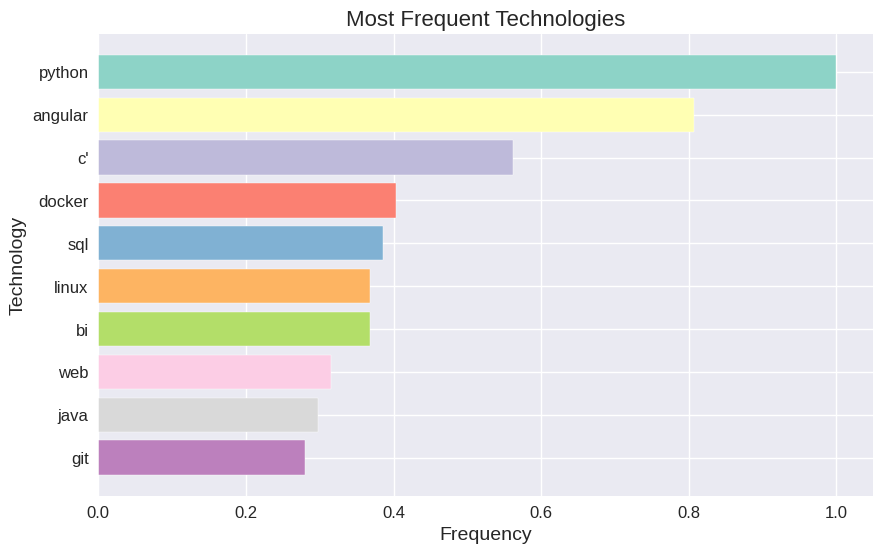

In [ ]:
from matplotlib.colors import ListedColormap

df = pd.DataFrame(most_important_technologies, columns=["Technology", "Frequency"])

# Step 6: Create a bar plot of the word frequencies
cmap = ListedColormap(["#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3", "#fdb462", "#b3de69", "#fccde5", "#d9d9d9", "#bc80bd"])

# Step 7: Create a beautiful bar plot of the word frequencies with different colors for each word
plt.style.use("seaborn")
plt.figure(figsize=(10, 6))
plt.barh(df["Technology"], df["Frequency"], color=cmap(range(len(df))))
plt.title("Most Frequent Technologies", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Technology", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_linewidth(0.5)
plt.gca().spines["bottom"].set_linewidth(0.5)
plt.gca().invert_yaxis()
plt.show()